# Course 1. Neural Networks and Deep Learning

## Introduction to Deep Learning

We are introducing $ReLU$ (Rectified Linear Unit) function which is used as a activation function. 
\begin{align}
f(x) =
	\begin{cases}
		x   & \quad x \geq 0\\
		0	& \quad x < 0
	\end{cases}
\end{align}

One of the major breakthroughs in NN computations was introducing $ReLU$ function instead of $Sigmoid$ function $f(x) = \frac{1}{1 + e ^{-x}}$. The advantage of $ReLU$ is that has value $0$ when $x < 0$, where $Sigmoid$ function has values that are close to $0$ and thus making the computation harder.
Additionally, gradient of $ReLU$ function is equal to $1$ for all positive $x$'s and 0 for other values and thus making the gradient descent runs much faster.

Especially interesting in Week 1 of the course was interview with Geoffrey Hinton where a lot of interesting ideas were mentioned so it would be really beneficial to watch this video again once I gain more knowledge about different models like Boltzman Machines etc.


In [1]:
import matplotlib.pyplot as plt
import numpy as np


def relu(x):
    return np.maximum(x, 0)


x = np.arange(-3, 3, 0.1, dtype = float)
y = relu(x)
plt.plot(x, y)

plt.xlabel('x')
plt.ylabel('y')
plt.title('Rectified Linear Unit')
plt.show()

<Figure size 640x480 with 1 Axes>

### Computation graph and chain rule

TODO

## Neural Network basics

### Image representation

Image is represented with the 3-dimensional matrix where dimensions represent values of Red Green and Blue respectively. 3-dimensional matrix is usually squeezed into 1-dimensional vector and this is what we are considering to be our $x$ in terms of image classification models.

### Binary classification and Neural Network Notation
In this section Andrew Ng defines binary classification problem, introduces Logistic Regression and $Sigmoid$ function but more importantly it introduces neural network notation that will be used throughout the course. He emphasizes that neural network notation will be different from the one used in his first Machine Learning course in a way that bias will be kept separately of parameters vector because it is more natural notation when implementing neural net.

For detail notation take a look at the file $\textit{neuralnetworknotation.pdf}$.

### Logistic regression cost function
We define a \textbf{loss function} as a measurement of how well we are doing on a single training example and \textbf{cost function} of how well we are doing on the entire training set.

Loss function for Logistic regression is:

\begin{align}
L(y, \hat{y}) = -(y\log{\hat{y}} + (1 - y)\log{(1 - \hat{y})})
\end{align}

where $\hat{y} = \sigma(w^Tx + b)$ and $\sigma$ is $Sigmoid$ function (in literature when we write $\log$ it usually stands for logarithm with the base of $e$). The questions that pops up is why we simply can't use $L(y, \hat{y}) = \frac{1}{2}(y - \hat{y})^2$ as a loss function? The answer is that optimization problem that we will encounter will become non-convex and thus gradient descent may converge to local optimum instead of global optimum.

Cost function for Logistic regression is:
\begin{align}
J(W, b) = \frac{1}{m}\sum_{i = 1}^{m}L(y^{(i)}, \hat{y}^{(i)}) = -\frac{1}{m}\sum_{i = 1}^{m}(y^{(i)}\log{\hat{y}^{(i)}} + (1 - y^{(i)})\log{(1 - \hat{y}^{(i)})})
\end{align}

People usually don't do random initialization for Logistic Regression because cost function is convex and thus the usual way is to simply initialize all the parameters to $0$.

### Broadcasting in Python

General principle for the python broadcasting is that if you have $(m, n)$ matrix and $(m, 1)$ matrix you would be able to apply any of operations $+, -, *, /$ because second matrix will be automatically extended up to $(m, n)$ by repeating the column $n$ times. Similarly, if you have $(m, n)$ matrix and $(1, n)$ matrix you would be able to apply arithmetic operations because second matrix will be automatically extended up to $(m, n)$ by repeating the raw $m$ times.


### Tips on numpy

1) Avoid using rank 1 arrays, they are not column vectors nor row vectors

In [2]:
import numpy as np

a = np.random.rand(5)

print(a.shape)
print(a)

a = a.reshape(1, 5)
print(a.shape)
print(a)

(5,)
[ 0.71820128  0.09352367  0.43305682  0.9310565   0.79726711]
(1, 5)
[[ 0.71820128  0.09352367  0.43305682  0.9310565   0.79726711]]


2) Use assertions

In [3]:
assert(a.shape == (1, 5))

### Explanation of Logistic Regression cost function

Our task is to model the probability $p(y|x)$, so we need to come up with the function, lets name it $\hat{y}$, that will satisfy the requirements: when $y = 1$, $p(y|x) = \hat{y}$ and when $y = 0$, $p(y|x) = 1 - \hat{y}$. These 2 cases described $p(y|x)$ so we are now going to try to write $p(y|x)$ in a single equation: 

\begin{align}
p(y|x) = \hat{y}^y (1 - \hat{y})^{1 - y}
\end{align}

Since $\log$ is strictly monotonically increasing function, instead of modeling $p(y|x)$ we can model $\log(p(y|x)$ and that would give us the same results. Introducing the log function will give us something like this:

\begin{align}
\log{p(y|x)} = y\log{\hat{y}} + (1 - y)\log{(1 - \hat{y})}
\end{align}

In machine learning we usually want to minimize the loss and that means maximizing the $p(y|x)$ and thus we define $L(y, \hat{y}) = -p(y|x)$. We can now define $\hat{y}$ as a simple polinomial function and add sigmoid to make it satisify probability requirements to be between $0$ and $1$. Thus $\hat{y} = \sigma(\theta^Tx + b)$. Also, when caluclating gradients sigmoid function has a convinient property $\sigma'(x) = \sigma(x) (1 - \sigma(x))$ so that is something that we should keep in mind.

### Normalization

Another common technique we use in Machine Learning and Deep Learning is to normalize our data. It often leads to a better performance because gradient descent converges faster after normalization. Here, by normalization we mean changing x to $\frac{x}{\| x\|}$ (dividing each row vector of x by its norm).
For example, if $$x = 
\begin{bmatrix}
    0 & 3 & 4 \\
    2 & 6 & 4 \\
\end{bmatrix}$$ then $$\| x\| = np.linalg.norm(x, axis = 1, keepdims = True) = \begin{bmatrix}
    5 \\
    \sqrt{56} \\
\end{bmatrix}$$and        $$ x\_normalized = \frac{x}{\| x\|} = \begin{bmatrix}
    0 & \frac{3}{5} & \frac{4}{5} \\
    \frac{2}{\sqrt{56}} & \frac{6}{\sqrt{56}} & \frac{4}{\sqrt{56}} \\
\end{bmatrix}$$

### Softmax

Softmax or normalized exponential function is a generalization of Sigmoid function that maps vectors from $\mathbb{R}^n$ into $n$ dimensional vector of real numbers from $[0, 1]$ range, that adds up to $1$.

$$
softmax: \mathbb{R}^n \rightarrow [0, 1]^n
$$

$$
softmax(x) = softmax(\begin{bmatrix}
    x_1  &&
    x_2  &&
    ...  &&
    x_n  
\end{bmatrix}) = \begin{bmatrix}
    \frac{e^{x_1}}{\sum_{j}e^{x_j}}  &&
    \frac{e^{x_2}}{\sum_{j}e^{x_j}}  &&
    ...  &&
    \frac{e^{x_n}}{\sum_{j}e^{x_j}} 
\end{bmatrix}
$$ 

You can think of softmax as a normalizing function used when your algorithm needs to classify two or more classes.

### Programming assignement - cats classifier

* A trick when you want to flatten a matrix X of shape (a,b,c,d) to a matrix X_flatten of shape (b ∗ c ∗ d, a) is to use:

In [4]:
import numpy as np

X = np.random.rand(200, 10, 10 , 3)
print(X.shape)
X_flatten = X.reshape(X.shape[0], -1).T
print(X_flatten.shape)

(200, 10, 10, 3)
(300, 200)


* To represent color images, the red, green and blue channels (RGB) must be specified for each pixel, and so the pixel value is actually a vector of three numbers ranging from 0 to 255.
One common preprocessing step in machine learning is to center and standardize your dataset, meaning that you substract the mean of the whole numpy array from each example, and then divide each example by the standard deviation of the whole numpy array. But for picture datasets, it is simpler and more convenient and works almost as well to just divide every row of the dataset by 255 (the maximum value of a pixel channel). Lets standardize our data.

<!-- During the training of your model, you're going to multiply weights and add biases to some initial inputs in order to observe neuron activations. Then you backpropogate with the gradients to train the model. But, it is extremely important for each feature to have a similar range such that our gradients don't explode. You will see that more in detail later in the lectures. !--> 

## Shallow Neural Networks

### Neural Networks representation

Neural network with input layer, one hidden layer and output layer is also refered in literature as a "2-layer" neural network because people usually don't take into an account the first (input) layer.

### Activation functions

Activation function that works almost always better then sigmoid function is **hyperbolic tangent** or **tanh**:

$$
\tanh: \mathbb{R} \rightarrow [-1, 1]
$$

$$
\tanh(x) = \frac{\sinh(x)}{\cosh(x)} = \frac{e^{x} - e^{-x}}{e^{x} + e^{-x}}
$$ 


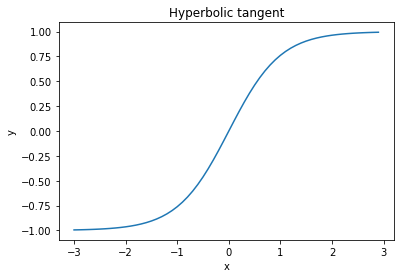

In [5]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(-3, 3, 0.1, dtype = float)
y = np.tanh(x)
plt.plot(x, y)

plt.xlabel('x')
plt.ylabel('y')
plt.title('Hyperbolic tangent')
plt.show()

Noticed that co-domain of this function is $[-1, 1]$ and thus it makes more sence to use sigmoid function as an activation of output layer. However, using $\tanh$ on all hidden layers gives much better performance then using sigmoid function on all layers of the network.

The downside of both $sigmoid$ and $\tanh$ functions is that derivative of these functions is close to $0$ when $x$ is very small or when $x$ is very large, and this can slow down gradient descent.

**ReLU** - goto beginning where **ReLU** is defined

One disadvantage of *ReLU* function is that derivative is equal to $0$ when $x$ is negative. In practice this works just fine but people are sometimes using the **Leaky ReLU** function which is just slight modification of *ReLU*.

$$
LeakyReLU(x) = \max(\lambda x, x)
$$

where $\lambda$ is some very small scalar like for example $0.0001$.

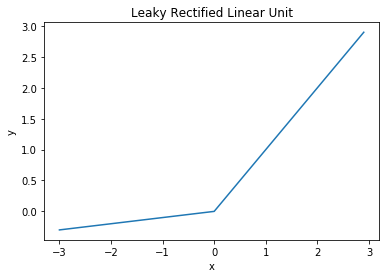

In [6]:
import matplotlib.pyplot as plt
import numpy as np


def leaky_relu(x, param):
    return np.maximum(param * x, x)


x = np.arange(-3, 3, 0.1, dtype = float)
param = 0.1
y = leaky_relu(x, param)
plt.plot(x, y)

plt.xlabel('x')
plt.ylabel('y')
plt.title('Leaky Rectified Linear Unit')
plt.show()

Here are some rules that can help you choose activation function:
* If we are solving binary classification problem then the *sigmoid* function is the natural choise for the output layer
* *Sigmoid* function should be almost never used on a hidden layers because *tanh* is explicitly superior
* The *ReLU* is conisdered to be the default function for the units in hidden layers and it gave the best results so far

### Why do we need non-linear activation functions?

It could be easily proven that if you take deep neural network with linear activation functions on all layers and with *sigmoid* activation on the output layer the model will be as expresive as simple logistic regression because *the composition of two linear function is also linear function*.

### Derivatives of activation functions

Sigmoid:

$$
\sigma(x) = \frac{1}{1 + e^{-x}} \\
\sigma'(x) = \sigma(x)(1 - \sigma(x))
$$

Hyperbolic tangent:

$$
\tanh(x) = \frac{e^{x} - e^{-x}}{e^{x} + e^{-x}} \\
\tanh'(x) = 1 - \tanh^2(x)
$$

ReLU:

$$
ReLU(x) = \max(0, x) \\
ReLU'(x) = \begin{cases}
            1   & \quad x > 0 \\
            0	& \quad x < 0 \\
   undefinded   & \quad x = 0
	\end{cases}
$$

Leaky ReLU:

$$
LeakyReLU(x) = \max(0.0001x, x) \\
LeakyReLU'(x) = \begin{cases}
            1   & \quad x > 0 \\
            0.0001	& \quad x < 0 \\
       undefinded   & \quad x = 0
	\end{cases}
$$


### Random initialization

For neural nets initializing parameters to $0$ won't work. Instead, the best practice is to initialize them randomly, usually like this:

In [7]:
import numpy as np

w = np.random.rand(2, 2) * 0.01
print(w)

[[ 0.0015674   0.00778366]
 [ 0.00311668  0.00011872]]


### Interview with Ian Goodfellow

He had 3 very important points imo:

1) While learning new stuff make sure you work on a project related to the topic in paralel so that you can practice what you have learn. Also, make sure that code for the project is publicly available (github).

2) A lot of the time, it's harder to reach the point where you have something polished enough to really be a new academic contribution to the scientific literature, but you can often get to the point of having a useful software product much earlier.

3) Research topic

In the past, we've seen computer security issues where attackers could fool a computer into running the wrong code. That's called application-level security. And there's been attacks where people can fool a computer into believing that messages on a network come from somebody that is not actually who they say they are. That's called network-level security. Now, we're starting to see that you can also fool machine-learning algorithms into doing things they shouldn't, even if the program running the machine-learning algorithm is running the correct code, even if the program running the machine-learning algorithm knows who all the messages on the network really came from. And I think, it's important to build security into a new technology near the start of its development. We found that it's very hard to build a working system first and then add security later.

## Deep Neural Network

This week is about already familiar topics such as forward and back prop and vectorization in the implementation itself. Because of that I will just write down couple of intersting points that appear in this week's lecutres:

* Circut theory: there are functions you can compute with small L-layer deep network that shallower networks requires exponentially more hidden units to compute.

* This graph nicely explains forward and backward propagation with caching of vector $z$

<img src="imgs/forwbackprop.png">

* Parameters of neural nets are: $W, b$ etc.
* Hyperparameters of neural nets are: learning rate, number of iterations, number of hidden layers, number of units in each layer, choise of activation function ... and advanced ones like momentum, mini batch size, regularization parameters etc
* When debuging neural nets it is extremely important to draw this graph and visualize how your net is behaving for different learning rates

<img src="imgs/cost.png">

* At the moment there is no easy way to tell which hyperparameters will work well and which will not except to try them out and emipiricaly come to the conclusion. This might change in the future so this can also be a research topic